## ClassifyAnything Part 3-1: Logistic Regression

_Supervised learning for classification_



### 3-1.1 Import data

In [7]:
# import packages
from sklearn.model_selection import GridSearchCV
import pickle
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

with open("outputs/03_Variables.pkl", 'rb') as file:
    (X_train, X_test, y_train, y_test, kfold) = pickle.load(file)

### 3-1.2 Train the model with cross-validation

In [6]:
# Define the hyperparameter grid for logistic regression. For example, you can tune the C parameter, which controls the regularization strength.
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create an instance of logistic regression and the GridSearchCV object:
logistic_model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(logistic_model, param_grid, cv=kfold)

grid_search.fit(X_train, y_train)
# Retrieve the best hyperparameters and best model:
best_c = grid_search.best_params_['C']
best_model = grid_search.best_estimator_
# Print the best hyperparameter value:
print("Best C parameter:", best_c)

Best C parameter: 10


### 3-1.3 Visualize fine-tuning of hyperparameters

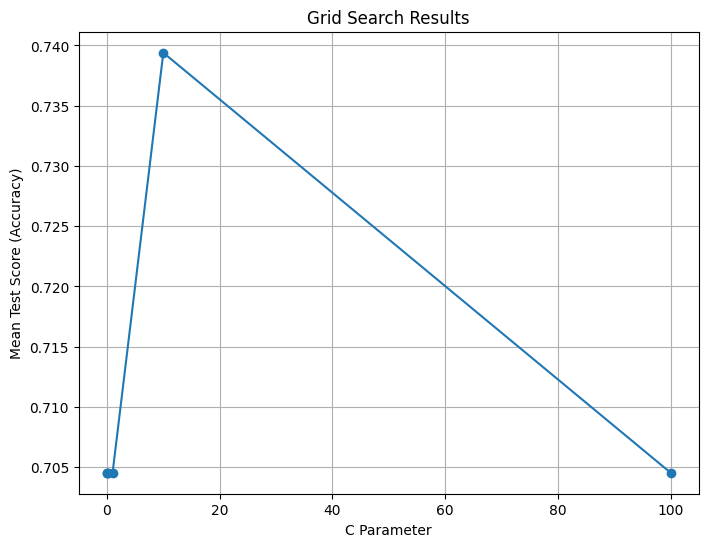

In [8]:
# Get the results of the grid search
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
params = results['params']
param_values = [param['C'] for param in params]

# Plot the grid search results
plt.figure(figsize=(8, 6))
plt.plot(param_values, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('C Parameter')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Grid Search Results')
plt.grid(True)
plt.show()

### 3-1.4 Save the model

In [9]:
import joblib
# Save the final trained model to a file
joblib.dump(best_model, 'outputs/03-1_Logistic_Regression_final_model.joblib')

['outputs/03-1_Logistic_Regression_final_model.joblib']